In [61]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import root

strr = ' '

def g(x):
    return -(29.4*x**2+20*x-8.8)
def f(x):
    return -(9.8*x**3 + 10*x**2 - 8.8*x)
def MPI(q,alpha,e,x0, x_r):
    w = []
    x1=x0
    x2=x1-alpha*f(x1)
    kol = 1
    print("n итер. | приближение X(n)           |  Апостериорная оценка                             |")
    print("________|____________________________|___________________________________________________|")
    strr2 = "{} <= {}".format(abs(x2 - x_r), q/(1-q)*abs(x2 - x_r))
    print("  {}     |  {} {}|  {} {}|".format(kol, x2, (25-len(str(x2)))*strr, strr2, strr*(48 - len(strr2))))
    print("________|____________________________|___________________________________________________|")
    w.append((x2-x_r)/(x1-x_r))
    pog = e*(1-q)/q
    while abs(x1-x2) > pog:
        x1=x2
        x2=x1-alpha*f(x1)
        kol += 1
        strr2 = "{} <= {}".format(abs(x2 - x_r), q/(1-q)*abs(x2 - x_r))
        print("  {}     |  {} {}|  {} {}|".format(kol, x2, (25-len(str(x2)))*strr, strr2, strr*(48 - len(strr2))))
        print("________|____________________________|___________________________________________________|")
        w.append((x2-x_r)/(x1-x_r))
    return (w, x2, kol)

w = []
e = 10**(-13)
a = -0.1
b = 0.1
xd = np.linspace(a, b, 100)
m = min(g(xd))
M = max(g(xd))
q = (M-m) / (M+m)
alpha = 2 / (m+M)
x0 = -0.02
r = root(f, x0)
x_r = r.x[0]
w, x3, c = MPI(q,alpha,e,x0, x_r)
print("m =", m, "; M =", M)
print("alpha = {0:.5f}; q = {1:.5f}; e = {2:.5f}; x0 = {3:.3f};".format(alpha, q, e, x0))
print("x = {}; f(x) = {}; кол-во итераций: {}.\n\n".format(x3, f(x3), c))
i = 1
for t in w:
    print("{} Скорость убывания погрешности: {}\n".format(i, t))
    i += 1

n итер. | приближение X(n)           |  Апостериорная оценка                             |
________|____________________________|___________________________________________________|
  1     |  0.0011523160122266646     |  0.0011523160122266646 <= 0.00035423178980223315  |
________|____________________________|___________________________________________________|
  2     |  -3.8265646704419834e-05   |  3.8265646704419834e-05 <= 1.1763186813532072e-05 |
________|____________________________|___________________________________________________|
  3     |  1.3243289653390894e-06    |  1.3243289653390894e-06 <= 4.0711004160439267e-07 |
________|____________________________|___________________________________________________|
  4     |  -4.577182898128929e-08    |  4.577182898128929e-08 <= 1.407065139295705e-08   |
________|____________________________|___________________________________________________|
  5     |  1.5820525124737107e-09    |  1.5820525124737107e-09 <= 4.863364624880758e-10  |

In [24]:
from scipy.optimize import root
def f(x):
    return 9.8*x**3 + 10*x**2 - 8.8*x
r = root(f, x0)
x_r = r.x[0]
print("x = {}; f(x) = {}".format(x_r, f(x_r)))


x = 0.0; f(x) = 0.0


In [16]:
#Априорная оценка
print("|x3 - x_r| <= |x0 - x_r| * q^c\n|{0} - {1}| <= |{2} - {1}| * {3}^{4}".format(x3, x_r, x0, q, c))
print(abs(x3 - x_r), "<=", (q**c)*abs(x0 - x_r))


|x3 - x_r| <= |x0 - x_r| * q^c
|0.5660257365439967 - 0.5660242345661401| <= |0.6 - 0.5660242345661401| * 0.3926694132689302^5
1.5019778565328323e-06 <= 0.000317179139941751


x           f(x)
-2.0; -20.800
-1.8; -11.115
-1.7; -3.632
-1.5; 1.881
-1.4; 5.656
-1.2; 7.922
-1.1; 8.913
-0.9; 8.860
-0.7; 7.993
-0.6; 6.545
-0.4; 4.747
-0.3; 2.830
-0.1; 1.026
0.1; -0.434
0.2; -1.318
0.4; -1.395
0.5; -0.433
0.7; 1.799
0.8; 5.533
1.0; 11.000


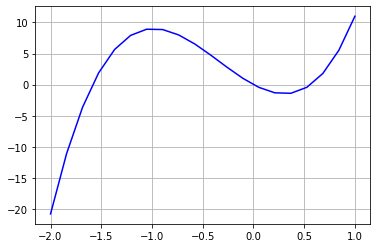

In [8]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return 9.8*x**3 + 10*x**2 - 8.8*x

x=np.linspace(-2, 1, 20)
plt.grid(True)
plt.plot(x,f(x),color='blue', label='o-s')

print("x           f(x)")
for it in x:
    print("{0:.1f}; {1:.3f}". format (it, f(it)))

x           g(x)
-2.0; 68.800
-1.9; 59.334
-1.8; 50.456
-1.7; 42.166
-1.6; 34.464
-1.5; 27.350
-1.4; 20.824
-1.3; 14.886
-1.2; 9.536
-1.1; 4.774
-1.0; 0.600
-0.9; -2.986
-0.8; -5.984
-0.7; -8.394
-0.6; -10.216
-0.5; -11.450
-0.4; -12.096
-0.3; -12.154
-0.2; -11.624
-0.1; -10.506
0.0; -8.800
0.1; -6.506
0.2; -3.624
0.3; -0.154
0.4; 3.904
0.5; 8.550
0.6; 13.784
0.7; 19.606
0.8; 26.016
0.9; 33.014
m = -12.027146814404434 ; M = 68.8


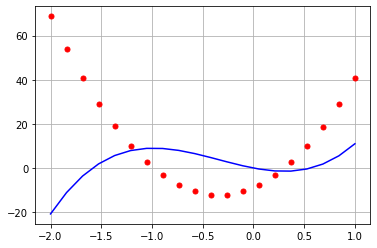

In [22]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return 9.8*x**3 + 10*x**2 - 8.8*x
def g(x):
    return 29.4*x**2+20*x-8.8

a = -2
b = 1
k = a

print("x           g(x)")
while k <= b:
    print("{0:.1f}; {1:.3f}". format (k, g(k)))
    k += 0.1
    
xg = np.linspace(-2, 1, 20)
m = min(g(xg))
M = max(g(xg))

print("m =", m, "; M =", M)
plt.grid(True)
plt.plot(x,f(x),color='blue', label='f')
plt.plot(x,g(x),color='red', label='g', ls='', marker='.', markersize=10)